In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

def visualize_count_mbr_categorical_displot(csv_directory, figsize=(14, 8), 
                                          title="Distribution of Count MBR", 
                                          save_path=None, max_datasets=None,
                                          multiple="stack", stat="count"):
    """
    Visualize Count MBR distributions using categorical bins with seaborn's displot.
    
    Args:
        csv_directory (str): Path to directory containing CSV files
        figsize (tuple): Figure size (width, height)
        title (str): Plot title
        save_path (str, optional): Path to save the figure
        max_datasets (int, optional): Maximum number of datasets to process
        multiple (str): How to display multiple datasets ('stack', 'dodge', 'layer')
        stat (str): Statistic to show ('count', 'percent', 'density', 'probability')
        
    Returns:
        seaborn FacetGrid
    """
    # Find all CSV files in the directory
    csv_files = glob.glob(os.path.join(csv_directory, "*.csv"))
    
    if max_datasets:
        csv_files = csv_files[:max_datasets]
    
    if not csv_files:
        raise ValueError(f"No CSV files found in {csv_directory}")
    
    # Define logarithmic bins and labels
    bin_edges = [0, 10, 100, 1000, 10000, 100000, 1000000, float('inf')]
    bin_labels = ['0-10', '10-100', '100-1K', '1K-10K', '10K-100K', '100K-1M', '>1M']
    
    # Function to assign bin category
    def assign_bin(value):
        for i, edge in enumerate(bin_edges[1:], 1):
            if value < edge:
                return bin_labels[i-1]
        return bin_labels[-1]
    
    # Collect all data into a single DataFrame
    all_data = []
    
    for csv_file in csv_files:
        # Extract dataset name from filename
        dataset_name = os.path.splitext(os.path.basename(csv_file))[0]
        dataset_name = dataset_name.replace("_results", "")

        
        try:
            df = pd.read_csv(csv_file)
            if 'Count MBR' not in df.columns:
                print(f"Warning: 'Count MBR' column not found in {csv_file}. Skipping.")
                continue
                
            # Add dataset name and bin category to each row
            df_subset = df[['Count MBR']].copy()
            df_subset['Dataset'] = dataset_name
            df_subset['Bin Category'] = df_subset['Count MBR'].apply(assign_bin)
            
            all_data.append(df_subset)
            
        except Exception as e:
            print(f"Error processing {csv_file}: {e}")
    
    if not all_data:
        raise ValueError("No valid data found in any CSV file")
    
    # Combine all data
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # Create a categorical type with the correct order
    bin_cat_type = pd.CategoricalDtype(categories=bin_labels, ordered=True)
    combined_df['Bin Category'] = combined_df['Bin Category'].astype(bin_cat_type)
    
    # Set figure aesthetics
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    
    # Create the displot
    g = sns.displot(
        data=combined_df,
        x='Bin Category',
        hue='Dataset',
        multiple=multiple,  # 'stack', 'dodge', 'layer'
        stat=stat,          # 'count', 'percent', 'density', 'probability'
        discrete=True,      # Treat x as discrete categories
        height=figsize[1]/1.2,
        aspect=figsize[0]/figsize[1]*1.2,
        # palette='viridis'
        legend=True
    )
    
    # Set labels and title
    g.set_xlabels('MBRs having $act_{int}$ between', fontsize=12)
    
    if stat == 'count':
        y_label = 'Number of MBRs (Datasets Entries)'
    elif stat == 'percent':
        y_label = 'Percent (%)'
    elif stat in ['density', 'probability']:
        y_label = 'Density'
    else:
        y_label = 'Value'
    
    g.set_ylabels(y_label, fontsize=12)
    # g.fig.suptitle(title, fontsize=14)
    # plt.subplots_adjust(top=0.9)  # Make room for the title
    
    # Rotate x-tick labels for better readability
    for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Save the figure if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return g

<Figure size 1400x800 with 0 Axes>

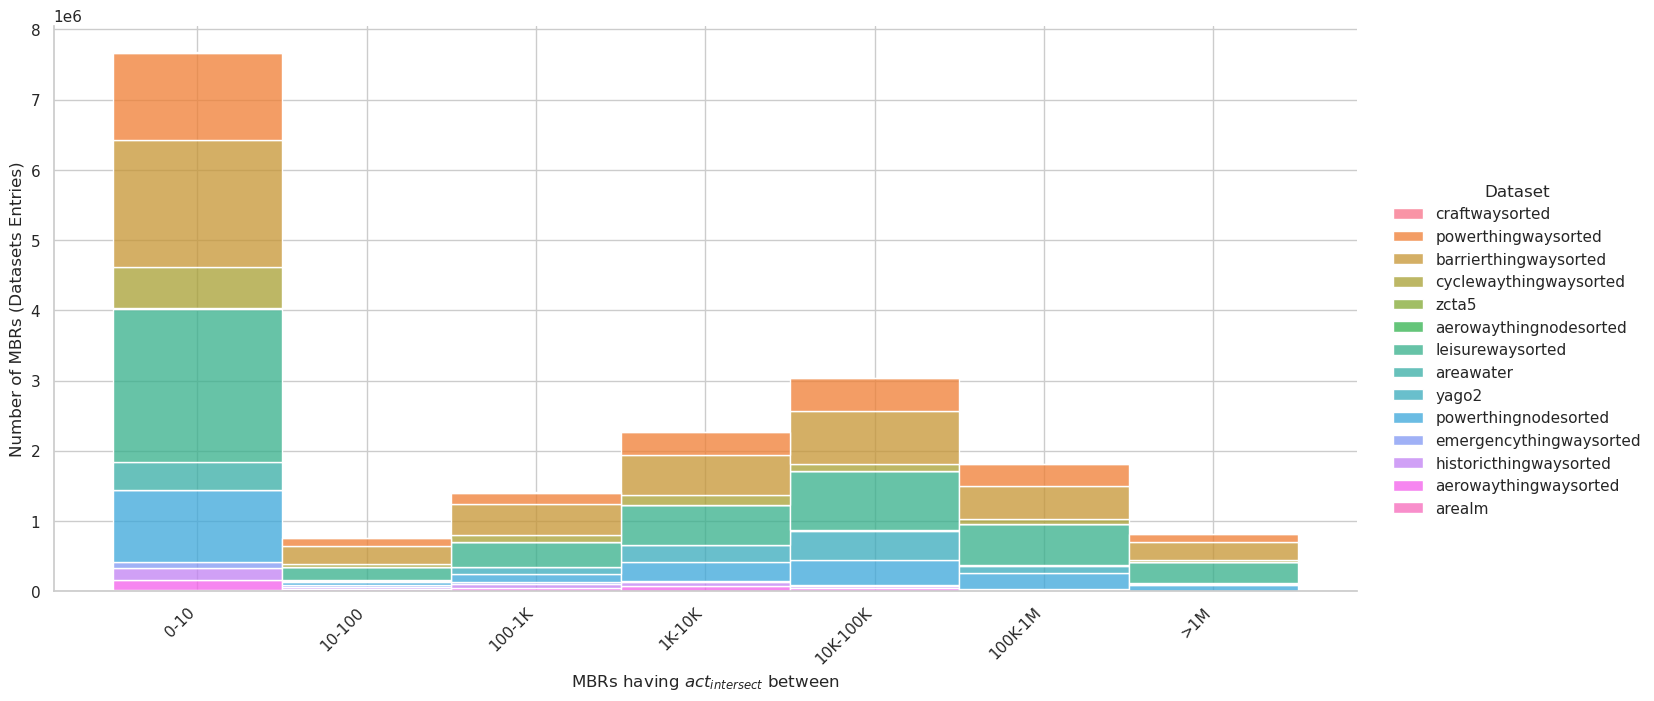

In [23]:
input_dir = '/home/adminlias/nadir/Spatial-Selectivity-Ext/large_files/resultsIntersects'

visualize_count_mbr_categorical_displot(
    input_dir, 
    title="Distribution of Count MBR",
    multiple="stack",
    stat="count",
    save_path="intersect_act_distrib.pdf",
    # max_datasets=1
)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

def visualize_count_mbr_categorical_displot(csv_directory, figsize=(14, 8), 
                                          title="Distribution of Count MBR", 
                                          save_path=None, max_datasets=None,
                                          multiple="stack", stat="count"):
    """
    Visualize Count MBR distributions using categorical bins with seaborn's displot.
    
    Args:
        csv_directory (str): Path to directory containing CSV files
        figsize (tuple): Figure size (width, height)
        title (str): Plot title
        save_path (str, optional): Path to save the figure
        max_datasets (int, optional): Maximum number of datasets to process
        multiple (str): How to display multiple datasets ('stack', 'dodge', 'layer')
        stat (str): Statistic to show ('count', 'percent', 'density', 'probability')
        
    Returns:
        seaborn FacetGrid
    """
    # Find all CSV files in the directory
    csv_files = glob.glob(os.path.join(csv_directory, "*.csv"))
    
    if max_datasets:
        csv_files = csv_files[:max_datasets]
    
    if not csv_files:
        raise ValueError(f"No CSV files found in {csv_directory}")
    
    # Define logarithmic bins and labels
    bin_edges = [0, 10, 100, 1000, 10000, 100000, 1000000, float('inf')]
    bin_labels = ['0-10', '10-100', '100-1K', '1K-10K', '10K-100K', '100K-1M', '>1M']
    
    # Function to assign bin category
    def assign_bin(value):
        for i, edge in enumerate(bin_edges[1:], 1):
            if value < edge:
                return bin_labels[i-1]
        return bin_labels[-1]
    
    # Collect all data into a single DataFrame
    all_data = []
    
    for csv_file in csv_files:
        # Extract dataset name from filename
        dataset_name = os.path.splitext(os.path.basename(csv_file))[0]
        dataset_name = dataset_name.replace("_results", "")

        
        try:
            df = pd.read_csv(csv_file)
            if 'Count MBR' not in df.columns:
                print(f"Warning: 'Count MBR' column not found in {csv_file}. Skipping.")
                continue
                
            # Add dataset name and bin category to each row
            df_subset = df[['Count MBR']].copy()
            df_subset['Dataset'] = dataset_name
            df_subset['Bin Category'] = df_subset['Count MBR'].apply(assign_bin)
            
            all_data.append(df_subset)
            
        except Exception as e:
            print(f"Error processing {csv_file}: {e}")
    
    if not all_data:
        raise ValueError("No valid data found in any CSV file")
    
    # Combine all data
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # Create a categorical type with the correct order
    bin_cat_type = pd.CategoricalDtype(categories=bin_labels, ordered=True)
    combined_df['Bin Category'] = combined_df['Bin Category'].astype(bin_cat_type)
    
    # Set figure aesthetics
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    
    # Create the displot
    g = sns.displot(
        data=combined_df,
        x='Bin Category',
        hue='Dataset',
        multiple=multiple,  # 'stack', 'dodge', 'layer'
        stat=stat,          # 'count', 'percent', 'density', 'probability'
        discrete=True,      # Treat x as discrete categories
        height=figsize[1]/1.2,
        aspect=figsize[0]/figsize[1]*1.2,
        # palette='viridis'
        legend=True
    )
    
    # Set labels and title
    g.set_xlabels('MBRs having $act_{con}$ between', fontsize=12)
    
    if stat == 'count':
        y_label = 'Number of MBRs (Datasets Entries)'
    elif stat == 'percent':
        y_label = 'Percent (%)'
    elif stat in ['density', 'probability']:
        y_label = 'Density'
    else:
        y_label = 'Value'
    
    g.set_ylabels(y_label, fontsize=12)
    # g.fig.suptitle(title, fontsize=14)
    # plt.subplots_adjust(top=0.9)  # Make room for the title
    
    # Rotate x-tick labels for better readability
    for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Save the figure if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return g

<Figure size 1400x800 with 0 Axes>

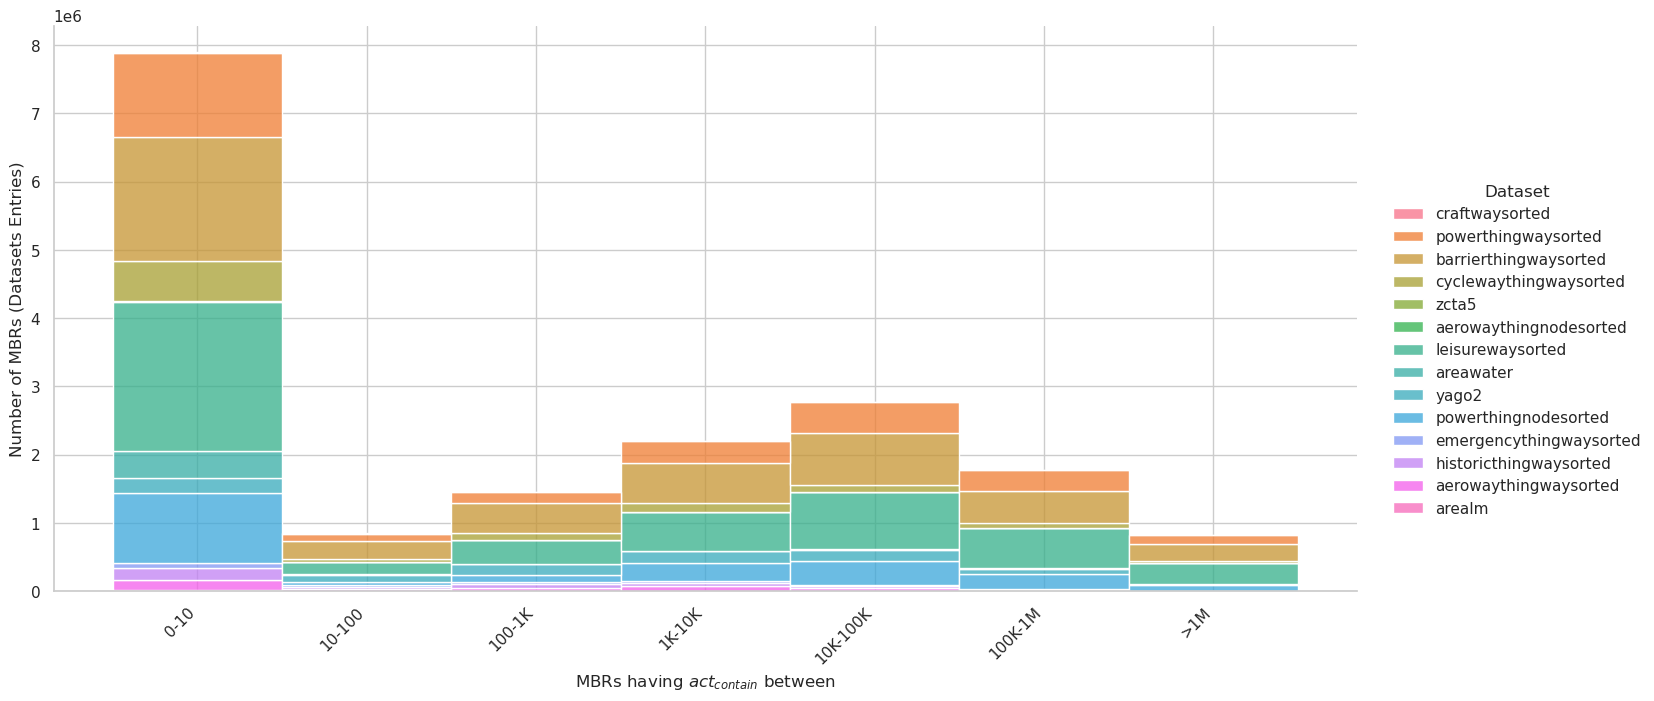

In [30]:
input_dir = '/home/adminlias/nadir/Spatial-Selectivity-Ext/large_files/resultsContains/'

visualize_count_mbr_categorical_displot(
    input_dir, 
    title="Distribution of Count MBR",
    multiple="stack",
    stat="count",
    save_path="contains_act_distrib.pdf",
    # max_datasets=1
)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

def visualize_count_mbr_categorical_displot(csv_directory, figsize=(14, 8), 
                                          title="Distribution of Count MBR", 
                                          save_path=None, max_datasets=None,
                                          multiple="stack", stat="count"):
    """
    Visualize Count MBR distributions using categorical bins with seaborn's displot.
    
    Args:
        csv_directory (str): Path to directory containing CSV files
        figsize (tuple): Figure size (width, height)
        title (str): Plot title
        save_path (str, optional): Path to save the figure
        max_datasets (int, optional): Maximum number of datasets to process
        multiple (str): How to display multiple datasets ('stack', 'dodge', 'layer')
        stat (str): Statistic to show ('count', 'percent', 'density', 'probability')
        
    Returns:
        seaborn FacetGrid
    """
    # Find all CSV files in the directory
    csv_files = glob.glob(os.path.join(csv_directory, "*.csv"))
    
    if max_datasets:
        csv_files = csv_files[:max_datasets]
    
    if not csv_files:
        raise ValueError(f"No CSV files found in {csv_directory}")
    
    # Define logarithmic bins and labels
    bin_edges = [0, 10, 100, 1000, 10000, 100000, 1000000, 2000000, 3000000, 4000000, 5000000, 
                6000000, 7000000, 8000000, 9000000, 10000000, 11000000, 12000000, 13000000, 
                14000000, 15000000, float('inf')]

    bin_labels = ['0-10', '10-100', '100-1K', '1K-10K', '10K-100K', '100K-1M', '1M-2M', '2M-3M', 
                '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '10M-11M', 
                '11M-12M', '12M-13M', '13M-14M', '14M-15M', '>15M']
    
    # Function to assign bin category
    def assign_bin(value):
        for i, edge in enumerate(bin_edges[1:], 1):
            if value < edge:
                return bin_labels[i-1]
        return bin_labels[-1]
    
    # Collect all data into a single DataFrame
    all_data = []
    
    for csv_file in csv_files:
        # Extract dataset name from filename
        dataset_name = os.path.splitext(os.path.basename(csv_file))[0]
        dataset_name = dataset_name.replace("_results", "")

        
        try:
            df = pd.read_csv(csv_file)
            if 'Count MBR' not in df.columns:
                print(f"Warning: 'Count MBR' column not found in {csv_file}. Skipping.")
                continue
                
            # Add dataset name and bin category to each row
            df_subset = df[['Count MBR']].copy()
            df_subset['Dataset'] = dataset_name
            df_subset['Bin Category'] = df_subset['Count MBR'].apply(assign_bin)
            
            all_data.append(df_subset)
            
        except Exception as e:
            print(f"Error processing {csv_file}: {e}")
    
    if not all_data:
        raise ValueError("No valid data found in any CSV file")
    
    # Combine all data
    combined_df = pd.concat(all_data, ignore_index=True)
    
    # Create a categorical type with the correct order
    bin_cat_type = pd.CategoricalDtype(categories=bin_labels, ordered=True)
    combined_df['Bin Category'] = combined_df['Bin Category'].astype(bin_cat_type)
    
    # Set figure aesthetics
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)
    
    # Create the displot
    g = sns.displot(
        data=combined_df,
        x='Bin Category',
        hue='Dataset',
        multiple=multiple,  # 'stack', 'dodge', 'layer'
        stat=stat,          # 'count', 'percent', 'density', 'probability'
        discrete=True,      # Treat x as discrete categories
        height=figsize[1]/1.2,
        aspect=figsize[0]/figsize[1]*1.2,
        # palette='viridis'
        legend=True
    )
    
    # Set labels and title
    g.set_xlabels('MBRs having $act_{dist}$ between', fontsize=12)
    
    if stat == 'count':
        y_label = 'Number of MBRs (Datasets Entries)'
    elif stat == 'percent':
        y_label = 'Percent (%)'
    elif stat in ['density', 'probability']:
        y_label = 'Density'
    else:
        y_label = 'Value'
    
    g.set_ylabels(y_label, fontsize=12)
    # g.fig.suptitle(title, fontsize=14)
    # plt.subplots_adjust(top=0.9)  # Make room for the title
    
    # Rotate x-tick labels for better readability
    for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Save the figure if a save path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return g

<Figure size 1400x800 with 0 Axes>

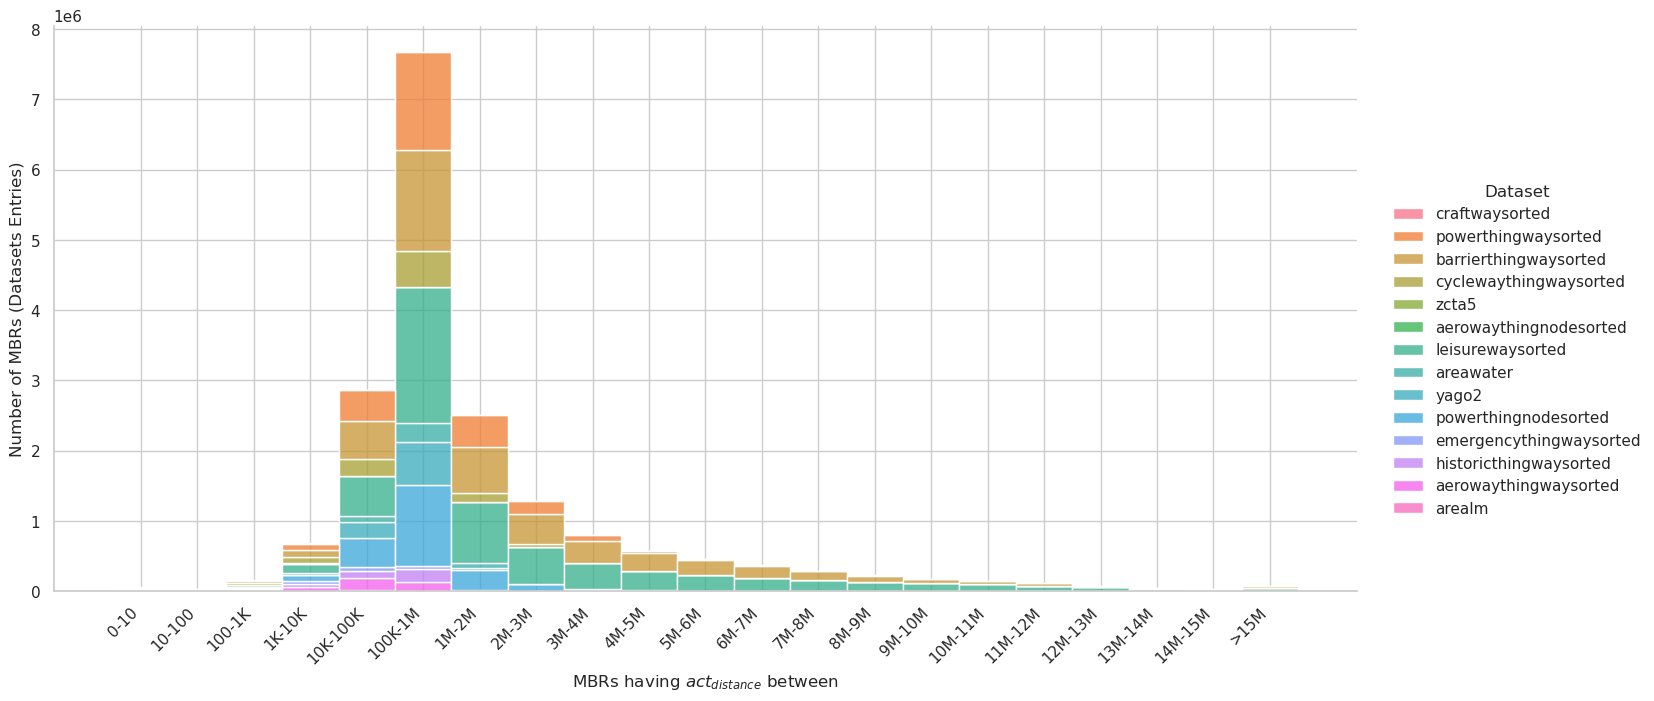

In [3]:
input_dir = '/home/adminlias/nadir/Spatial-Selectivity-Ext/large_files/resultsDistance/'

visualize_count_mbr_categorical_displot(
    input_dir, 
    title="Distribution of Count MBR",
    multiple="stack",
    stat="count",
    save_path="distance_act_distrib.pdf",
    # max_datasets=2
)

Loading intersect data...
Loading contain data...
Loading distance data...


/tmp/ipykernel_2712701/1332509161.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = data.groupby(['Bin Category', 'Dataset']).size().unstack(fill_value=0)
/tmp/ipykernel_2712701/1332509161.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = data.groupby(['Bin Category', 'Dataset']).size().unstack(fill_value=0)
/tmp/ipykernel_2712701/1332509161.py:136: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

Saved combined visualization to combined_act_distribution.pdf


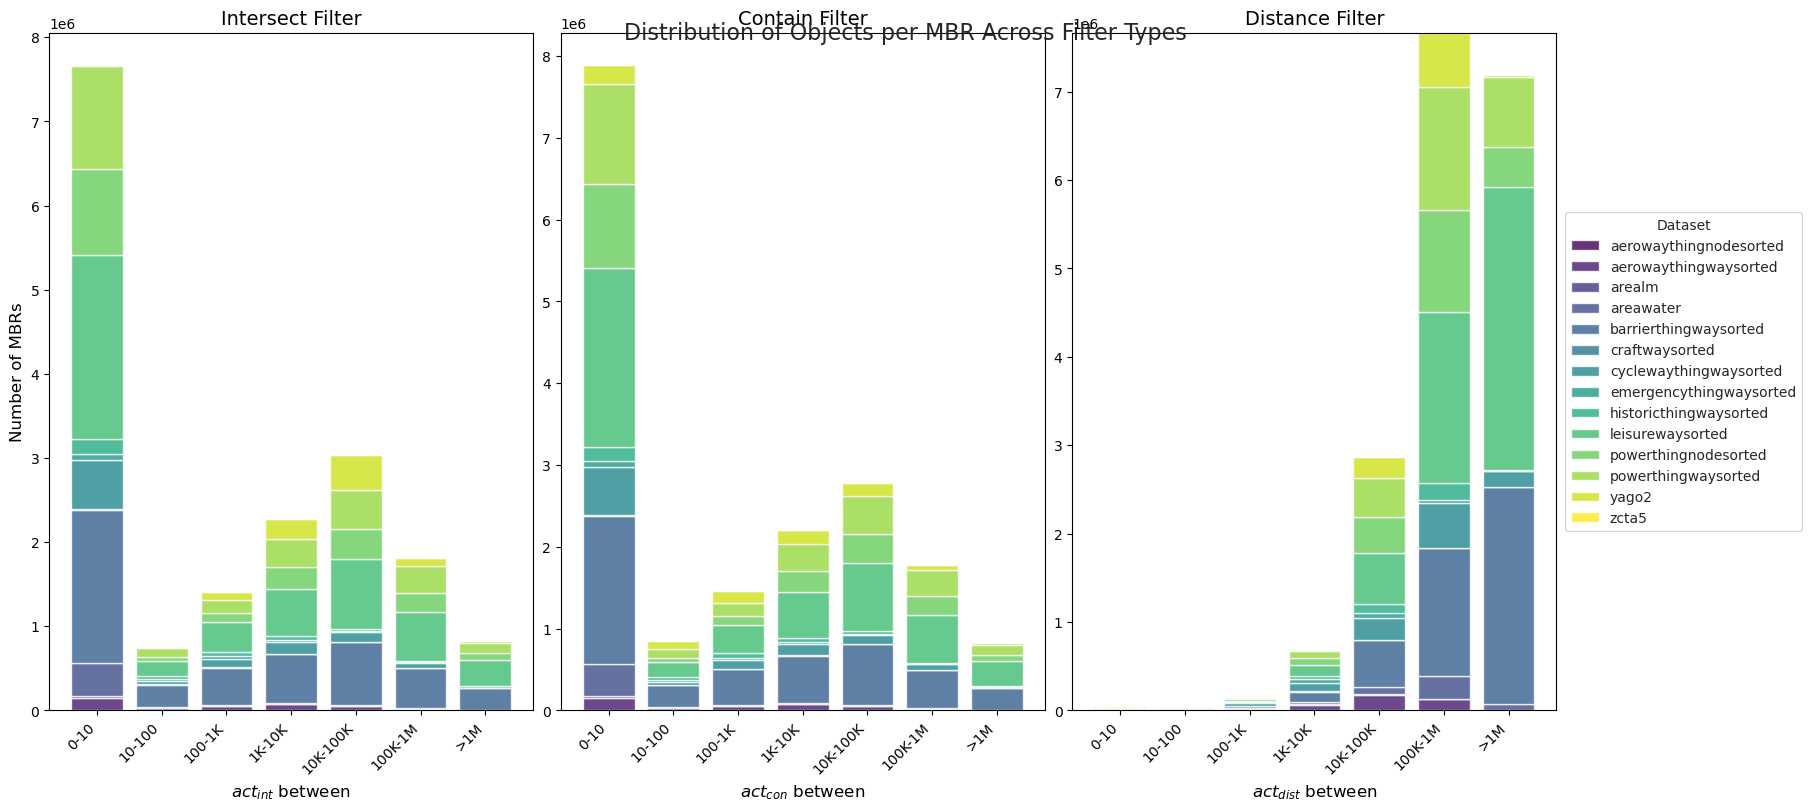

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from matplotlib.gridspec import GridSpec

def create_combined_filter_visualization(intersect_dir, contain_dir, distance_dir, 
                                        figsize=(18, 8), save_path=None, max_datasets=None,
                                        stat="count"):
    """
    Create a single visualization with all three filter types side by side, sharing a legend.
    
    Args:
        intersect_dir (str): Path to directory containing intersect CSV files
        contain_dir (str): Path to directory containing contain CSV files
        distance_dir (str): Path to directory containing distance CSV files
        figsize (tuple): Figure size (width, height)
        save_path (str, optional): Path to save the figure
        max_datasets (int, optional): Maximum number of datasets to process
        stat (str): Statistic to show ('count', 'percent', 'density', 'probability')
        
    Returns:
        matplotlib Figure
    """
    # Define logarithmic bins for intersect and contain filters
    bin_edges_standard = [0, 10, 100, 1000, 10000, 100000, 1000000, float('inf')]
    bin_labels_standard = ['0-10', '10-100', '100-1K', '1K-10K', '10K-100K', '100K-1M', '>1M']
    
    # Define extended bins for distance filter which typically has higher counts
    bin_edges_distance = [0, 10, 100, 1000, 10000, 100000, 1000000, float('inf')]
    bin_labels_distance = ['0-10', '10-100', '100-1K', '1K-10K', '10K-100K', '100K-1M', '>1M']
    
    # Function to load and process data from a directory
    def load_data(directory, bin_edges, bin_labels):
        # Find all CSV files in the directory
        csv_files = glob.glob(os.path.join(directory, "*.csv"))
        
        if max_datasets:
            csv_files = csv_files[:max_datasets]
        
        if not csv_files:
            print(f"No CSV files found in {directory}")
            return pd.DataFrame()
        
        # Function to assign bin category
        def assign_bin(value):
            for i, edge in enumerate(bin_edges[1:], 1):
                if value < edge:
                    return bin_labels[i-1]
            return bin_labels[-1]
        
        # Collect data
        all_data = []
        
        for csv_file in csv_files:
            dataset_name = os.path.splitext(os.path.basename(csv_file))[0]
            dataset_name = dataset_name.replace("_results", "")
            
            try:
                df = pd.read_csv(csv_file)
                if 'Count MBR' not in df.columns:
                    print(f"Warning: 'Count MBR' column not found in {csv_file}. Skipping.")
                    continue
                    
                df_subset = df[['Count MBR']].copy()
                df_subset['Dataset'] = dataset_name
                df_subset['Bin Category'] = df_subset['Count MBR'].apply(assign_bin)
                
                all_data.append(df_subset)
                
            except Exception as e:
                print(f"Error processing {csv_file}: {e}")
        
        if not all_data:
            print(f"No valid data found in {directory}")
            return pd.DataFrame()
        
        # Combine data
        combined_df = pd.concat(all_data, ignore_index=True)
        
        # Create a categorical type with the correct order
        bin_cat_type = pd.CategoricalDtype(categories=bin_labels, ordered=True)
        combined_df['Bin Category'] = combined_df['Bin Category'].astype(bin_cat_type)
        
        return combined_df
    
    # Load data for each filter type
    print("Loading intersect data...")
    intersect_df = load_data(intersect_dir, bin_edges_standard, bin_labels_standard)
    intersect_df['Filter Type'] = 'Intersect'
    
    print("Loading contain data...")
    contain_df = load_data(contain_dir, bin_edges_standard, bin_labels_standard)
    contain_df['Filter Type'] = 'Contain'
    
    print("Loading distance data...")
    distance_df = load_data(distance_dir, bin_edges_distance, bin_labels_distance)
    distance_df['Filter Type'] = 'Distance'
    
    # Check if we have valid data
    if intersect_df.empty and contain_df.empty and distance_df.empty:
        raise ValueError("No valid data found in any of the directories")
    
    # Set up the figure with GridSpec for more control
    fig = plt.figure(figsize=figsize, constrained_layout=True)
    gs = GridSpec(1, 4, width_ratios=[1, 1, 1, 0.2], figure=fig)
    
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    legend_ax = fig.add_subplot(gs[0, 3])
    
    # Set style
    sns.set_style("whitegrid")
    
    # Function to plot on a given axis
    def plot_on_axis(ax, data, title, x_label):
        if data.empty:
            ax.text(0.5, 0.5, "No Data Available", ha='center', va='center')
            return []
        
        # Get unique datasets for consistent colors across plots
        all_datasets = pd.concat([
            intersect_df['Dataset'] if not intersect_df.empty else pd.Series(), 
            contain_df['Dataset'] if not contain_df.empty else pd.Series(),
            distance_df['Dataset'] if not distance_df.empty else pd.Series()
        ]).unique()
        
        # Create a color mapping
        colors = plt.cm.viridis(np.linspace(0, 1, len(all_datasets)))
        color_map = {dataset: colors[i] for i, dataset in enumerate(sorted(all_datasets))}
        
        # Group data by bin and dataset
        bin_counts = data.groupby(['Bin Category', 'Dataset']).size().unstack(fill_value=0)
        
        # Reset index to make Bin Category a column
        bin_counts = bin_counts.reset_index()
        
        # Plot stacked bars
        bottom = np.zeros(len(bin_counts))
        handles = []
        
        for dataset in sorted(data['Dataset'].unique()):
            if dataset in bin_counts:
                bars = ax.bar(
                    bin_counts['Bin Category'], 
                    bin_counts[dataset],
                    bottom=bottom, 
                    label=dataset, 
                    color=color_map.get(dataset),
                    alpha=0.8
                )
                bottom += bin_counts[dataset].values
                handles.append(bars[0])
        
        # Configure axis
        ax.set_title(title, fontsize=14)
        ax.set_xlabel(x_label, fontsize=12)
        if stat == "count":
            ax.set_ylabel('Number of MBRs', fontsize=12)
        elif stat == "percent":
            ax.set_ylabel('Percent (%)', fontsize=12)
        
        # Set x-tick labels rotation
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        return handles
    
    # Create the plots
    handles1 = plot_on_axis(
        ax1, intersect_df, 
        'Intersect Filter', 
        '$act_{int}$ between'
    )
    
    handles2 = plot_on_axis(
        ax2, contain_df, 
        'Contain Filter', 
        '$act_{con}$ between'
    )
    
    handles3 = plot_on_axis(
        ax3, distance_df, 
        'Distance Filter', 
        '$act_{dist}$ between'
    )
    
    # Only show y-axis label on the first subplot
    ax2.set_ylabel('')
    ax3.set_ylabel('')
    
    # Collect all handles and labels for the legend
    all_handles = []
    all_labels = []
    
    # Get all unique datasets across all dataframes
    all_datasets = pd.concat([
        intersect_df['Dataset'] if not intersect_df.empty else pd.Series(), 
        contain_df['Dataset'] if not contain_df.empty else pd.Series(),
        distance_df['Dataset'] if not distance_df.empty else pd.Series()
    ]).unique()
    
    # Create a combined legend
    legend_ax.axis('off')  # Turn off axis for legend panel
    
    # Find handle for each dataset (from whichever plot has it)
    for dataset in sorted(all_datasets):
        handle = None
        for handles, df in zip([handles1, handles2, handles3], 
                             [intersect_df, contain_df, distance_df]):
            if not df.empty and dataset in df['Dataset'].unique() and handles:
                idx = sorted(df['Dataset'].unique()).index(dataset)
                if idx < len(handles):
                    handle = handles[idx]
                    break
        
        if handle:
            all_handles.append(handle)
            all_labels.append(dataset)
    
    if all_handles:
        legend_ax.legend(all_handles, all_labels, loc='center', title='Dataset')
    
    # Set a main title for the entire figure
    fig.suptitle('Distribution of Objects per MBR Across Filter Types', fontsize=16, y=0.98)
    
    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f"Saved combined visualization to {save_path}")
    
    return fig

# Usage
input_dir_intersect = '/home/adminlias/nadir/Spatial-Selectivity-Ext/large_files/resultsIntersects'
input_dir_contain = '/home/adminlias/nadir/Spatial-Selectivity-Ext/large_files/resultsContains'
input_dir_distance = '/home/adminlias/nadir/Spatial-Selectivity-Ext/large_files/resultsDistance'

# Create combined visualization
fig = create_combined_filter_visualization(
    input_dir_intersect,
    input_dir_contain,
    input_dir_distance,
    figsize=(18, 8),
    save_path="combined_act_distribution.pdf",
    stat="count"
)

Loading intersect data...


/tmp/ipykernel_2712701/3571929435.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bin_counts = combined_df.groupby('Bin Category').size().to_dict()


Loading contain data...


/tmp/ipykernel_2712701/3571929435.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bin_counts = combined_df.groupby('Bin Category').size().to_dict()


Loading distance data...


/tmp/ipykernel_2712701/3571929435.py:142: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_bin_counts = combined_df.groupby('Bin Category').size().to_dict()


Saved combined visualization to combined_act_distribution.pdf
Saved data to act_distribution_data.json


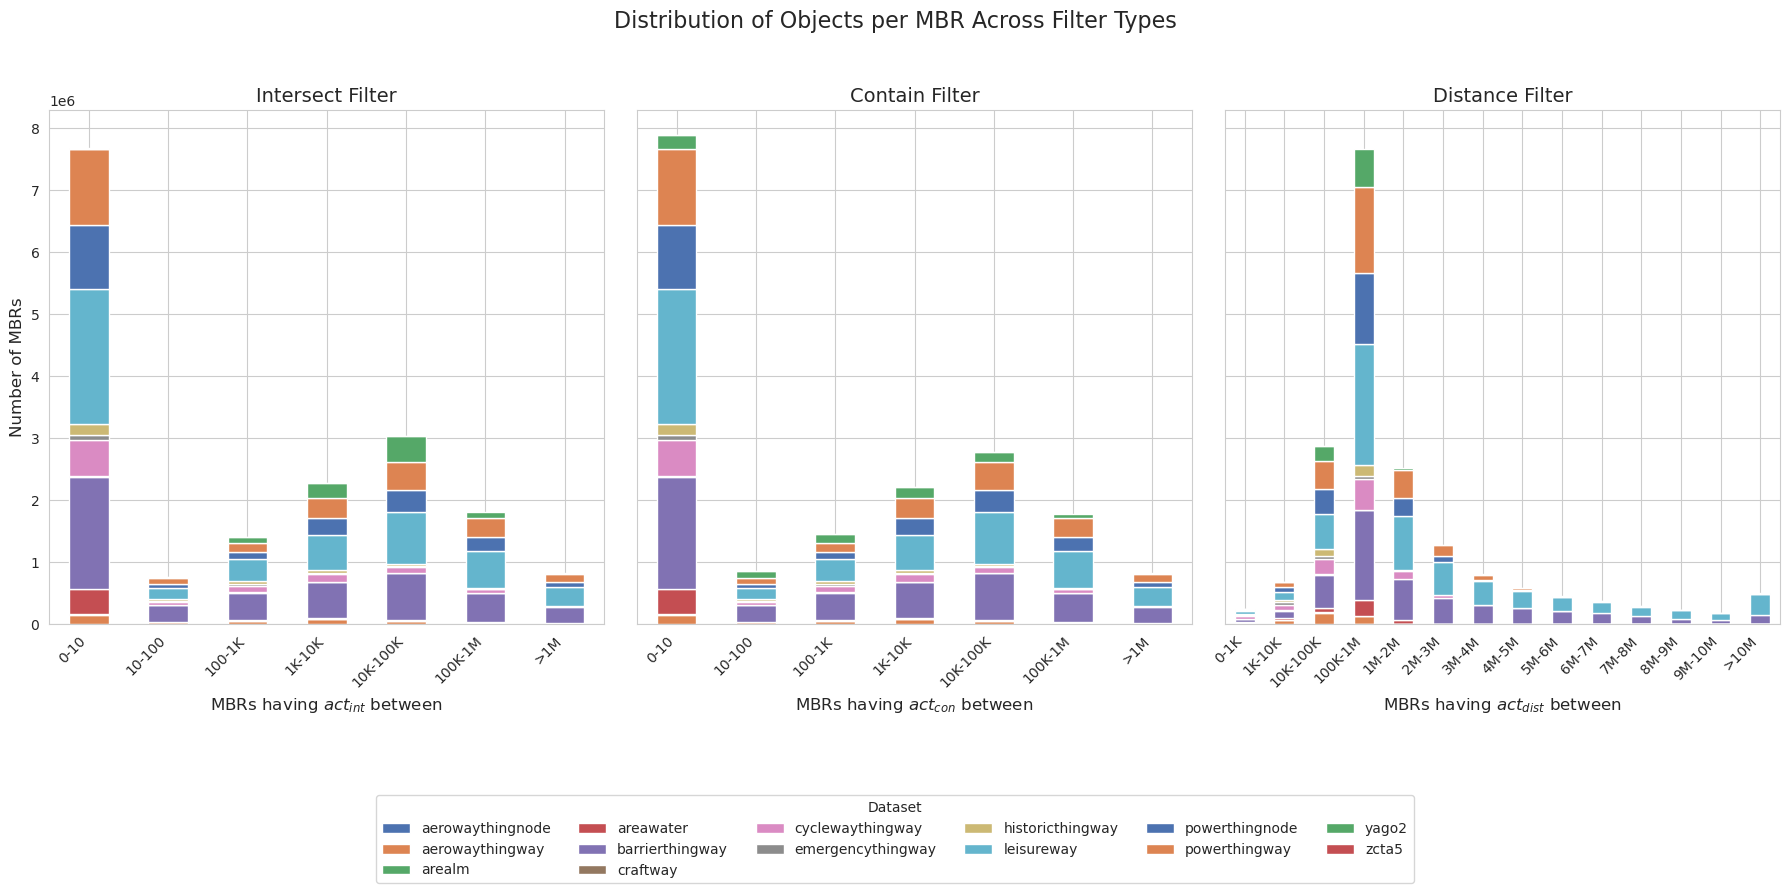

In [ ]:
def create_combined_filter_visualization_with_json(intersect_dir, contain_dir, distance_dir, 
                                        figsize=(18, 10), save_path=None, json_path=None, 
                                        max_datasets=None, stat="count"):
    """
    Create a single visualization with all three filter types side by side, with legend at bottom.
    Also exports the data to a JSON file for further use.
    
    Args:
        intersect_dir (str): Path to directory containing intersect CSV files
        contain_dir (str): Path to directory containing contain CSV files
        distance_dir (str): Path to directory containing distance CSV files
        figsize (tuple): Figure size (width, height)
        save_path (str, optional): Path to save the figure
        json_path (str, optional): Path to save the data as JSON
        max_datasets (int, optional): Maximum number of datasets to process
        stat (str): Statistic to show ('count', 'percent')
        
    Returns:
        tuple: (matplotlib figure, data dictionary)
    """
    import json
    
    # Define logarithmic bins for intersect and contain filters
    bin_edges_standard = [0, 10, 100, 1000, 10000, 100000, 1000000, float('inf')]
    bin_labels_standard = ['0-10', '10-100', '100-1K', '1K-10K', '10K-100K', '100K-1M', '>1M']
    
    # Define extended bins for distance filter which typically has higher counts
    bin_edges_distance = [0, 1000, 10000, 100000, 1000000, 2000000, 3000000, 4000000, 5000000, 
                         6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
    bin_labels_distance = ['0-1K', '1K-10K', '10K-100K', '100K-1M', '1M-2M', '2M-3M', 
                         '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '>10M']
    
    # Create data structure to hold information for JSON export
    json_data = {
        "filters": {
            "intersect": {
                "bin_ranges": [],
                "datasets": {},
                "totals": {},
                "bin_edges": bin_edges_standard
            },
            "contain": {
                "bin_ranges": [],
                "datasets": {},
                "totals": {},
                "bin_edges": bin_edges_standard
            },
            "distance": {
                "bin_ranges": [],
                "datasets": {},
                "totals": {},
                "bin_edges": bin_edges_distance
            }
        },
        "metadata": {
            "total_datasets": 0,
            "total_mbrs": {
                "intersect": 0,
                "contain": 0,
                "distance": 0
            }
        }
    }
    
    # Function to load and process data from a directory
    def load_data(directory, bin_edges, bin_labels, filter_type):
        # Find all CSV files in the directory
        csv_files = glob.glob(os.path.join(directory, "*.csv"))
        
        if max_datasets:
            csv_files = csv_files[:max_datasets]
        
        if not csv_files:
            print(f"No CSV files found in {directory}")
            return pd.DataFrame()
        
        # Store bin labels in JSON data
        json_data["filters"][filter_type]["bin_ranges"] = bin_labels
        
        # Function to assign bin category
        def assign_bin(value):
            for i, edge in enumerate(bin_edges[1:], 1):
                if value < edge:
                    return bin_labels[i-1]
            return bin_labels[-1]
        
        # Collect data
        all_data = []
        
        for csv_file in csv_files:
            dataset_name = os.path.splitext(os.path.basename(csv_file))[0]
            dataset_name = dataset_name.replace("_results", "")
            dataset_name = dataset_name.replace("sorted", "")
            
            try:
                df = pd.read_csv(csv_file)
                if 'Count MBR' not in df.columns:
                    print(f"Warning: 'Count MBR' column not found in {csv_file}. Skipping.")
                    continue
                    
                df_subset = df[['Count MBR']].copy()
                df_subset['Dataset'] = dataset_name
                df_subset['Bin Category'] = df_subset['Count MBR'].apply(assign_bin)
                
                # Initialize dataset in JSON if not already there
                if dataset_name not in json_data["filters"][filter_type]["datasets"]:
                    json_data["filters"][filter_type]["datasets"][dataset_name] = {
                        "total_mbrs": len(df_subset),
                        "bin_counts": {},
                        "stats": {
                            "min": float(df_subset['Count MBR'].min()),
                            "max": float(df_subset['Count MBR'].max()),
                            "mean": float(df_subset['Count MBR'].mean()),
                            "median": float(df_subset['Count MBR'].median())
                        }
                    }
                
                # Count MBRs by bin for this dataset
                bin_counts = df_subset.groupby('Bin Category').size().to_dict()
                json_data["filters"][filter_type]["datasets"][dataset_name]["bin_counts"] = bin_counts
                
                all_data.append(df_subset)
                
            except Exception as e:
                print(f"Error processing {csv_file}: {e}")
        
        if not all_data:
            print(f"No valid data found in {directory}")
            return pd.DataFrame()
        
        # Combine data
        combined_df = pd.concat(all_data, ignore_index=True)
        
        # Create a categorical type with the correct order
        bin_cat_type = pd.CategoricalDtype(categories=bin_labels, ordered=True)
        combined_df['Bin Category'] = combined_df['Bin Category'].astype(bin_cat_type)
        
        # Update total MBRs in metadata
        json_data["metadata"]["total_mbrs"][filter_type] = len(combined_df)
        
        # Calculate totals across all datasets
        total_bin_counts = combined_df.groupby('Bin Category').size().to_dict()
        json_data["filters"][filter_type]["totals"] = {
            "bin_counts": total_bin_counts,
            "total_mbrs": len(combined_df)
        }
        
        return combined_df
    
    # Load data for each filter type
    print("Loading intersect data...")
    intersect_df = load_data(intersect_dir, bin_edges_standard, bin_labels_standard, "intersect")
    intersect_df['Filter Type'] = 'Intersect'
    
    print("Loading contain data...")
    contain_df = load_data(contain_dir, bin_edges_standard, bin_labels_standard, "contain")
    contain_df['Filter Type'] = 'Contain'
    
    print("Loading distance data...")
    distance_df = load_data(distance_dir, bin_edges_distance, bin_labels_distance, "distance")
    distance_df['Filter Type'] = 'Distance'
    
    # Update metadata
    all_datasets = set()
    for filter_type in ["intersect", "contain", "distance"]:
        all_datasets.update(json_data["filters"][filter_type]["datasets"].keys())
    
    json_data["metadata"]["total_datasets"] = len(all_datasets)
    json_data["metadata"]["datasets"] = list(all_datasets)
    
    # Check if we have valid data
    if intersect_df.empty and contain_df.empty and distance_df.empty:
        raise ValueError("No valid data found in any of the directories")
    
    # Set up the figure with 1x3 subplots
    fig, axes = plt.subplots(1, 3, figsize=figsize, sharey=True)
    
    # Set seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("deep")  # Use seaborn's default color palette
    
    # Function to plot on a given axis using seaborn
    def plot_on_axis(ax, data, title, x_label, bin_labels):
        if data.empty:
            ax.text(0.5, 0.5, "No Data Available", ha='center', va='center')
            return [], []
        
        # Create stacked count data for each bin and dataset
        bin_counts = pd.crosstab(data['Bin Category'], data['Dataset'])
        
        # We'll use pandas' plot method but with seaborn styling applied
        bin_counts.plot(kind='bar', stacked=True, ax=ax, legend=False)
        
        # Set title and labels using seaborn style
        ax.set_title(title, fontsize=14)
        ax.set_xlabel(x_label, fontsize=12)
        
        if ax == axes[0]:  # Only set y-label on first plot
            if stat == "count":
                ax.set_ylabel('Number of MBRs', fontsize=12)
            elif stat == "percent":
                ax.set_ylabel('Percent (%)', fontsize=12)
        
        # Set x-tick labels rotation
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
        
        # Return handles for legend
        handles, labels = ax.get_legend_handles_labels()
        return handles, labels
    
    # Create the plots with respective bins
    handles1, labels1 = plot_on_axis(
        axes[0], intersect_df, 
        'Intersect Filter', 
        'MBRs having $act_{int}$ between',
        bin_labels_standard
    )
    
    handles2, labels2 = plot_on_axis(
        axes[1], contain_df, 
        'Contain Filter', 
        'MBRs having $act_{con}$ between',
        bin_labels_standard
    )
    
    handles3, labels3 = plot_on_axis(
        axes[2], distance_df, 
        'Distance Filter', 
        'MBRs having $act_{dist}$ between',
        bin_labels_distance
    )
    
    # Get legend handles and labels from the first plot that has them
    for handles, labels in [(handles1, labels1), (handles2, labels2), (handles3, labels3)]:
        if handles:
            legend_handles = handles
            legend_labels = labels
            break
    
    # Add a unified legend at the bottom of the figure
    fig.legend(
        legend_handles, legend_labels,
        loc='lower center',
        ncol=min(6, len(legend_labels) if legend_labels else 0),  # Display datasets in multiple columns
        bbox_to_anchor=(0.5, -0.12),  # Position below subplots
        title='Dataset',
        frameon=True
    )
    
    # Add overall title with seaborn styling
    # fig.suptitle('Distribution of Objects per MBR Across Filter Types', fontsize=16, y=0.98)
    
    # Adjust layout to make room for legend at bottom
    plt.tight_layout(rect=[0, 0.08, 1, 0.95])  # [left, bottom, right, top]
    
    # Save the figure if a path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        print(f"Saved combined visualization to {save_path}")
    
    # Save the data to JSON if a path is provided
    if json_path:
        with open(json_path, 'w') as f:
            json.dump(json_data, f, indent=2)
        print(f"Saved data to {json_path}")
    
    return fig, json_data

# Usage
input_dir_intersect = '/home/adminlias/nadir/Spatial-Selectivity-Ext/large_files/resultsIntersects'
input_dir_contain = '/home/adminlias/nadir/Spatial-Selectivity-Ext/large_files/resultsContains'
input_dir_distance = '/home/adminlias/nadir/Spatial-Selectivity-Ext/large_files/resultsDistance'

# Create combined visualization and save data to JSON
fig, data = create_combined_filter_visualization_with_json(
    input_dir_intersect,
    input_dir_contain,
    input_dir_distance,
    figsize=(18, 8),
    save_path="combined_act_distribution.pdf",
    json_path="act_distribution_data.json",
    stat="count"
)

In [ ]:
def create_individual_dataset_plots(intersect_dir, contain_dir, distance_dir, 
                                   output_dir="individual_plots", save_format="pdf"):
    """
    Create individual plots for each dataset, showing distribution across all three filter types.
    
    Args:
        intersect_dir (str): Path to directory containing intersect CSV files
        contain_dir (str): Path to directory containing contain CSV files
        distance_dir (str): Path to directory containing distance CSV files
        output_dir (str): Directory to save individual plots
        save_format (str): File format for saving plots (pdf, png, etc.)
    """
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Define logarithmic bins for intersect and contain filters
    bin_edges_standard = [0, 10, 100, 1000, 10000, 100000, 1000000, float('inf')]
    bin_labels_standard = ['0-10', '10-100', '100-1K', '1K-10K', '10K-100K', '100K-1M', '>1M']
    
    # Define extended bins for distance filter which typically has higher counts
    bin_edges_distance = [0, 1000, 10000, 100000, 1000000, 2000000, 3000000, 4000000, 5000000, 
                         6000000, 7000000, 8000000, 9000000, 10000000, float('inf')]
    bin_labels_distance = ['0-1K', '1K-10K', '10K-100K', '100K-1M', '1M-2M', '2M-3M', 
                         '3M-4M', '4M-5M', '5M-6M', '6M-7M', '7M-8M', '8M-9M', '9M-10M', '>10M']
    
    # Function to load and process data from a directory
    def load_data(directory, bin_edges, bin_labels):
        # Find all CSV files in the directory
        csv_files = glob.glob(os.path.join(directory, "*.csv"))
        
        if not csv_files:
            print(f"No CSV files found in {directory}")
            return pd.DataFrame()
        
        # Function to assign bin category
        def assign_bin(value):
            for i, edge in enumerate(bin_edges[1:], 1):
                if value < edge:
                    return bin_labels[i-1]
            return bin_labels[-1]
        
        # Collect data
        all_data = []
        
        for csv_file in csv_files:
            dataset_name = os.path.splitext(os.path.basename(csv_file))[0]
            dataset_name = dataset_name.replace("_results", "")
            
            try:
                df = pd.read_csv(csv_file)
                if 'Count MBR' not in df.columns:
                    print(f"Warning: 'Count MBR' column not found in {csv_file}. Skipping.")
                    continue
                    
                df_subset = df[['Count MBR']].copy()
                df_subset['Dataset'] = dataset_name
                df_subset['Bin Category'] = df_subset['Count MBR'].apply(assign_bin)
                
                all_data.append(df_subset)
                
            except Exception as e:
                print(f"Error processing {csv_file}: {e}")
        
        if not all_data:
            print(f"No valid data found in {directory}")
            return pd.DataFrame()
        
        # Combine data
        combined_df = pd.concat(all_data, ignore_index=True)
        
        # Create a categorical type with the correct order
        bin_cat_type = pd.CategoricalDtype(categories=bin_labels, ordered=True)
        combined_df['Bin Category'] = combined_df['Bin Category'].astype(bin_cat_type)
        
        return combined_df
    
    # Load data for each filter type
    print("Loading intersect data...")
    intersect_df = load_data(intersect_dir, bin_edges_standard, bin_labels_standard)
    intersect_df['Filter Type'] = 'Intersect'
    
    print("Loading contain data...")
    contain_df = load_data(contain_dir, bin_edges_standard, bin_labels_standard)
    contain_df['Filter Type'] = 'Contain'
    
    print("Loading distance data...")
    distance_df = load_data(distance_dir, bin_edges_distance, bin_labels_distance)
    distance_df['Filter Type'] = 'Distance'
    
    # Get all unique datasets
    all_datasets = set(intersect_df['Dataset'].unique()) | set(contain_df['Dataset'].unique()) | set(distance_df['Dataset'].unique())
    print(f"Found {len(all_datasets)} unique datasets")
    
    # Set seaborn style
    sns.set_style("whitegrid")
    sns.set_palette("deep")  # Use seaborn's default color palette
    
    # Process each dataset individually
    for dataset in all_datasets:
        print(f"Processing dataset: {dataset}")
        
        # Filter data for this dataset
        dataset_intersect = intersect_df[intersect_df['Dataset'] == dataset]
        dataset_contain = contain_df[contain_df['Dataset'] == dataset]
        dataset_distance = distance_df[distance_df['Dataset'] == dataset]
        
        # Skip if no data for this dataset
        if dataset_intersect.empty and dataset_contain.empty and dataset_distance.empty:
            print(f"  No data available for {dataset}. Skipping.")
            continue
        
        # Create figure for this dataset
        fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
        
        # Plot intersect data
        if not dataset_intersect.empty:
            bin_counts = dataset_intersect.groupby('Bin Category').size()
            axes[0].bar(bin_counts.index, bin_counts.values, color='#1f77b4')
            axes[0].set_title(f'Intersect Filter', fontsize=14)
            axes[0].set_xlabel('Objects per MBR', fontsize=12)
            axes[0].set_ylabel('Number of MBRs', fontsize=12)
            plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')
        else:
            axes[0].text(0.5, 0.5, "No Data", ha='center', va='center', transform=axes[0].transAxes)
            axes[0].set_title(f'Intersect Filter', fontsize=14)
        
        # Plot contain data
        if not dataset_contain.empty:
            bin_counts = dataset_contain.groupby('Bin Category').size()
            axes[1].bar(bin_counts.index, bin_counts.values, color='#ff7f0e')
            axes[1].set_title(f'Contain Filter', fontsize=14)
            axes[1].set_xlabel('Objects per MBR', fontsize=12)
            plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')
        else:
            axes[1].text(0.5, 0.5, "No Data", ha='center', va='center', transform=axes[1].transAxes)
            axes[1].set_title(f'Contain Filter', fontsize=14)
        
        # Plot distance data
        if not dataset_distance.empty:
            bin_counts = dataset_distance.groupby('Bin Category').size()
            axes[2].bar(bin_counts.index, bin_counts.values, color='#2ca02c')
            axes[2].set_title(f'Distance Filter', fontsize=14)
            axes[2].set_xlabel('Objects per MBR', fontsize=12)
            plt.setp(axes[2].get_xticklabels(), rotation=45, ha='right')
        else:
            axes[2].text(0.5, 0.5, "No Data", ha='center', va='center', transform=axes[2].transAxes)
            axes[2].set_title(f'Distance Filter', fontsize=14)
        
        # Add dataset name as overall title
        # fig.suptitle(f'Distribution of Objects per MBR - {dataset}', fontsize=16, y=0.98)
        
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # [left, bottom, right, top]
        
        # Save figure
        output_path = os.path.join(output_dir, f"{dataset}_distribution.{save_format}")
        plt.savefig(output_path, bbox_inches='tight', dpi=300)
        plt.close(fig)
        
        print(f"  Saved plot to {output_path}")
    
    print("All individual dataset plots created.")

# Usage example
create_individual_dataset_plots(
    '/home/adminlias/nadir/Spatial-Selectivity-Ext/large_files/resultsIntersects',
    '/home/adminlias/nadir/Spatial-Selectivity-Ext/large_files/resultsContains',
    '/home/adminlias/nadir/Spatial-Selectivity-Ext/large_files/resultsDistance',
    output_dir="individual_plots",
    save_format="pdf"
)

Loading intersect data...
Loading contain data...
Loading distance data...
Found 14 unique datasets
Processing dataset: powerthingwaysorted


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C

  Saved plot to individual_plots/powerthingwaysorted_distribution.pdf
Processing dataset: powerthingnodesorted


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C

  Saved plot to individual_plots/powerthingnodesorted_distribution.pdf
Processing dataset: aerowaythingwaysorted


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C

  Saved plot to individual_plots/aerowaythingwaysorted_distribution.pdf
Processing dataset: arealm


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C

  Saved plot to individual_plots/arealm_distribution.pdf
Processing dataset: craftwaysorted


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C

  Saved plot to individual_plots/craftwaysorted_distribution.pdf
Processing dataset: aerowaythingnodesorted


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C

  Saved plot to individual_plots/aerowaythingnodesorted_distribution.pdf
Processing dataset: zcta5


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C

  Saved plot to individual_plots/zcta5_distribution.pdf
Processing dataset: historicthingwaysorted


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C

  Saved plot to individual_plots/historicthingwaysorted_distribution.pdf
Processing dataset: areawater


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C

  Saved plot to individual_plots/areawater_distribution.pdf
Processing dataset: leisurewaysorted


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C

  Saved plot to individual_plots/leisurewaysorted_distribution.pdf
Processing dataset: yago2


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C

  Saved plot to individual_plots/yago2_distribution.pdf
Processing dataset: emergencythingwaysorted


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C

  Saved plot to individual_plots/emergencythingwaysorted_distribution.pdf
Processing dataset: cyclewaythingwaysorted


/tmp/ipykernel_2712701/74902818.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_intersect.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:129: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_contain.groupby('Bin Category').size()
/tmp/ipykernel_2712701/74902818.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = dataset_distance.groupby('Bin C